In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pt
# from dash import Dash, dcc, html, Input, Output

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Exam data TS.csv')

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME'] = pd.to_datetime(df['TIME'])
df['DATE'] = df['DATE'].dt.strftime('%Y-%m-%d')
df['DATE'] = df['DATE'] + ' ' + df['TIME'].dt.strftime('%H:%M:%S')
df['DATE'] = pd.to_datetime(df['DATE'])

In [4]:
df.drop(['TIME'], axis=1, inplace = True)

In [5]:
df['DEMAND'] = df['DEMAND'].ffill()

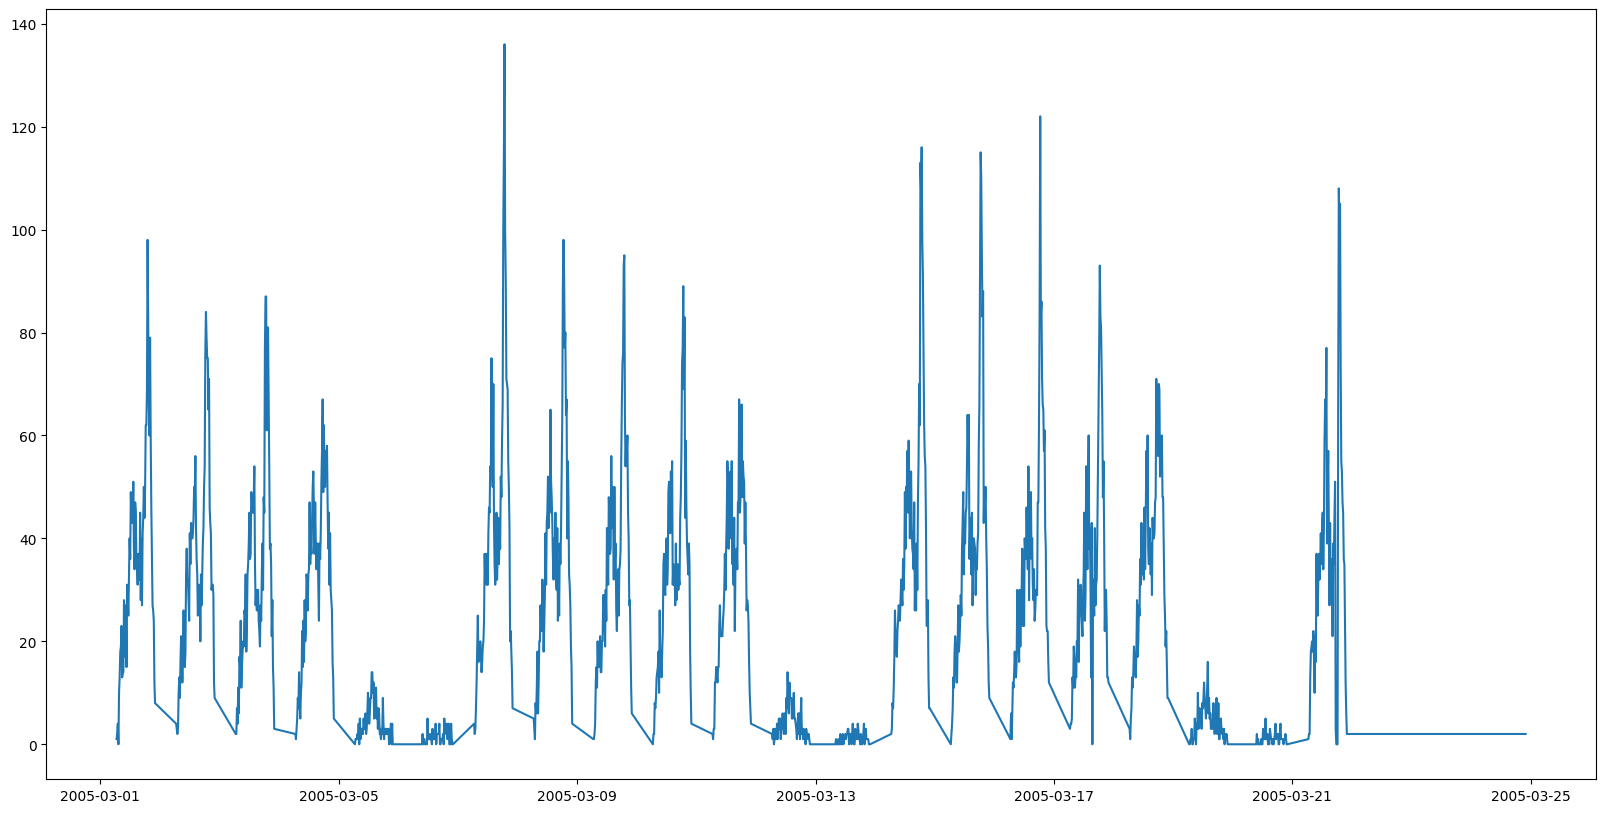

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df['DATE'], df['DEMAND'])

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['DEMAND'], model= 'additive',period=62)

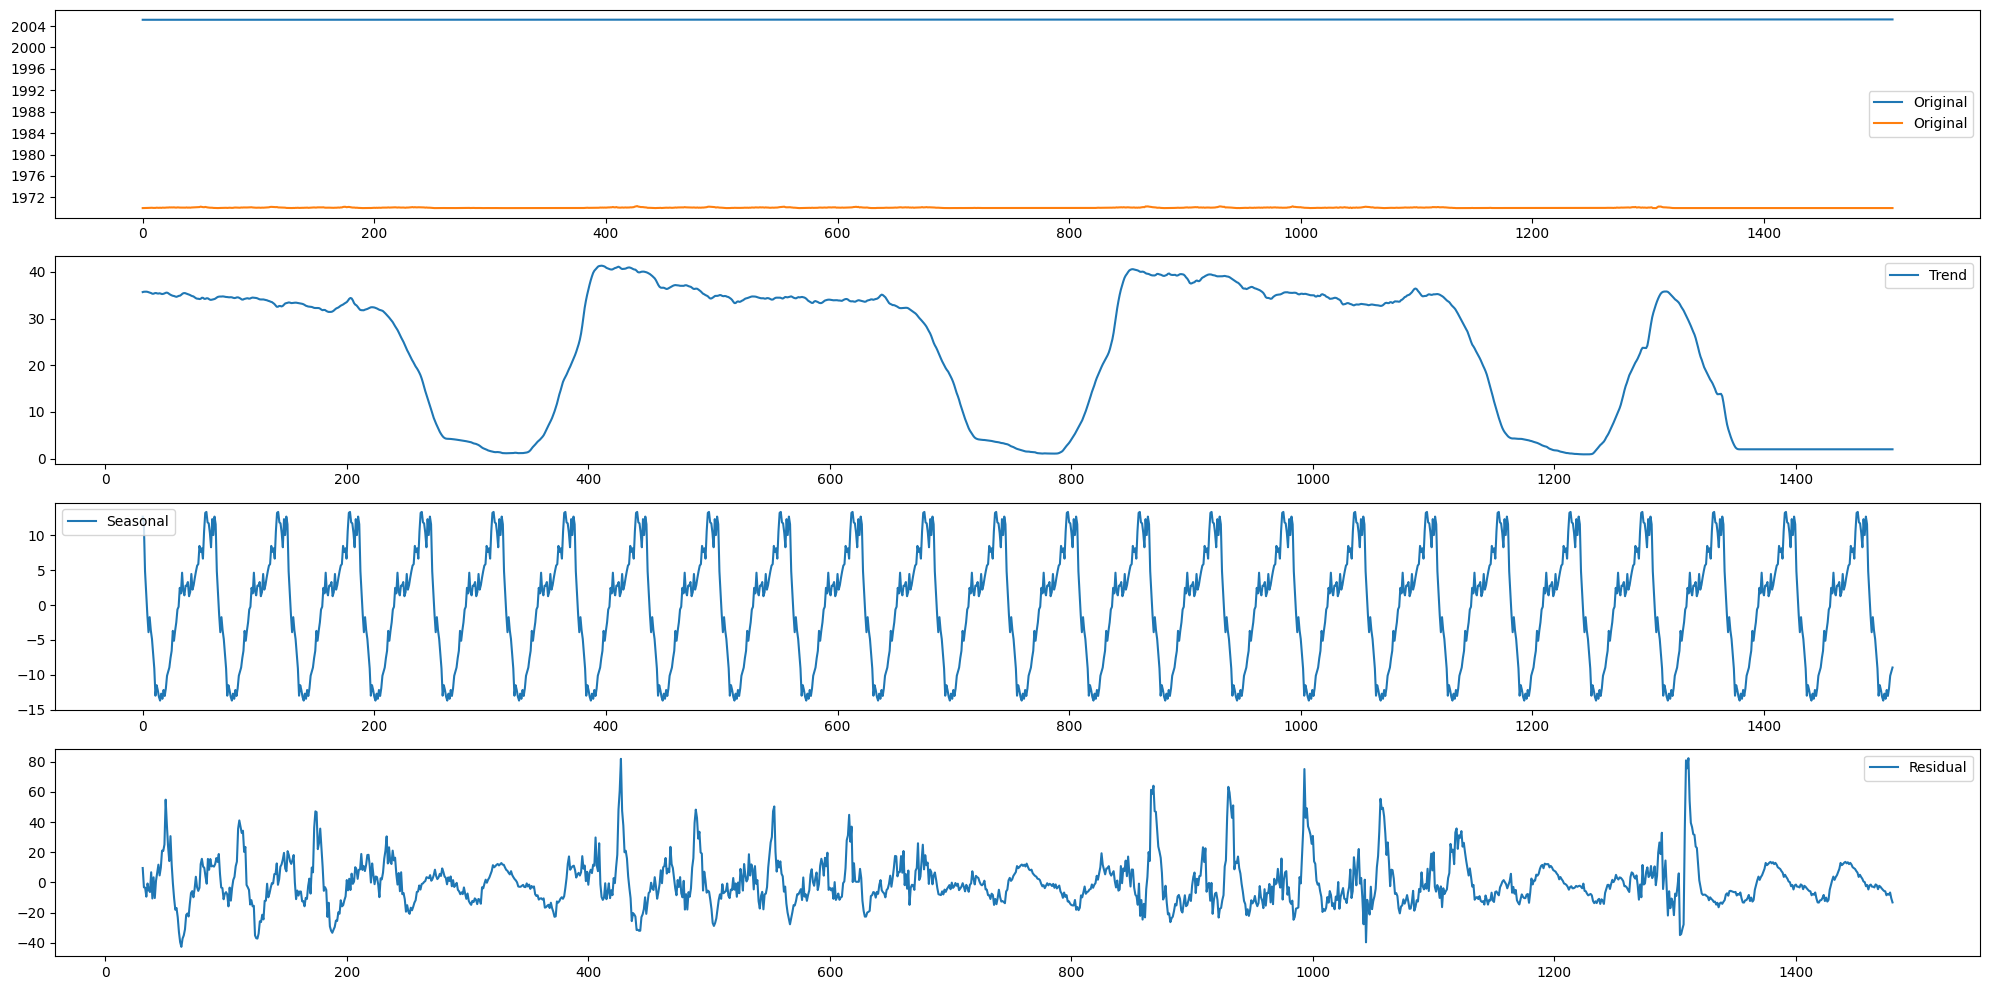

In [8]:
plt.figure(figsize=(20, 10))

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['DEMAND'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')

ADF Statistic: -4.513704
p-value: 0.000186
Critical Values:


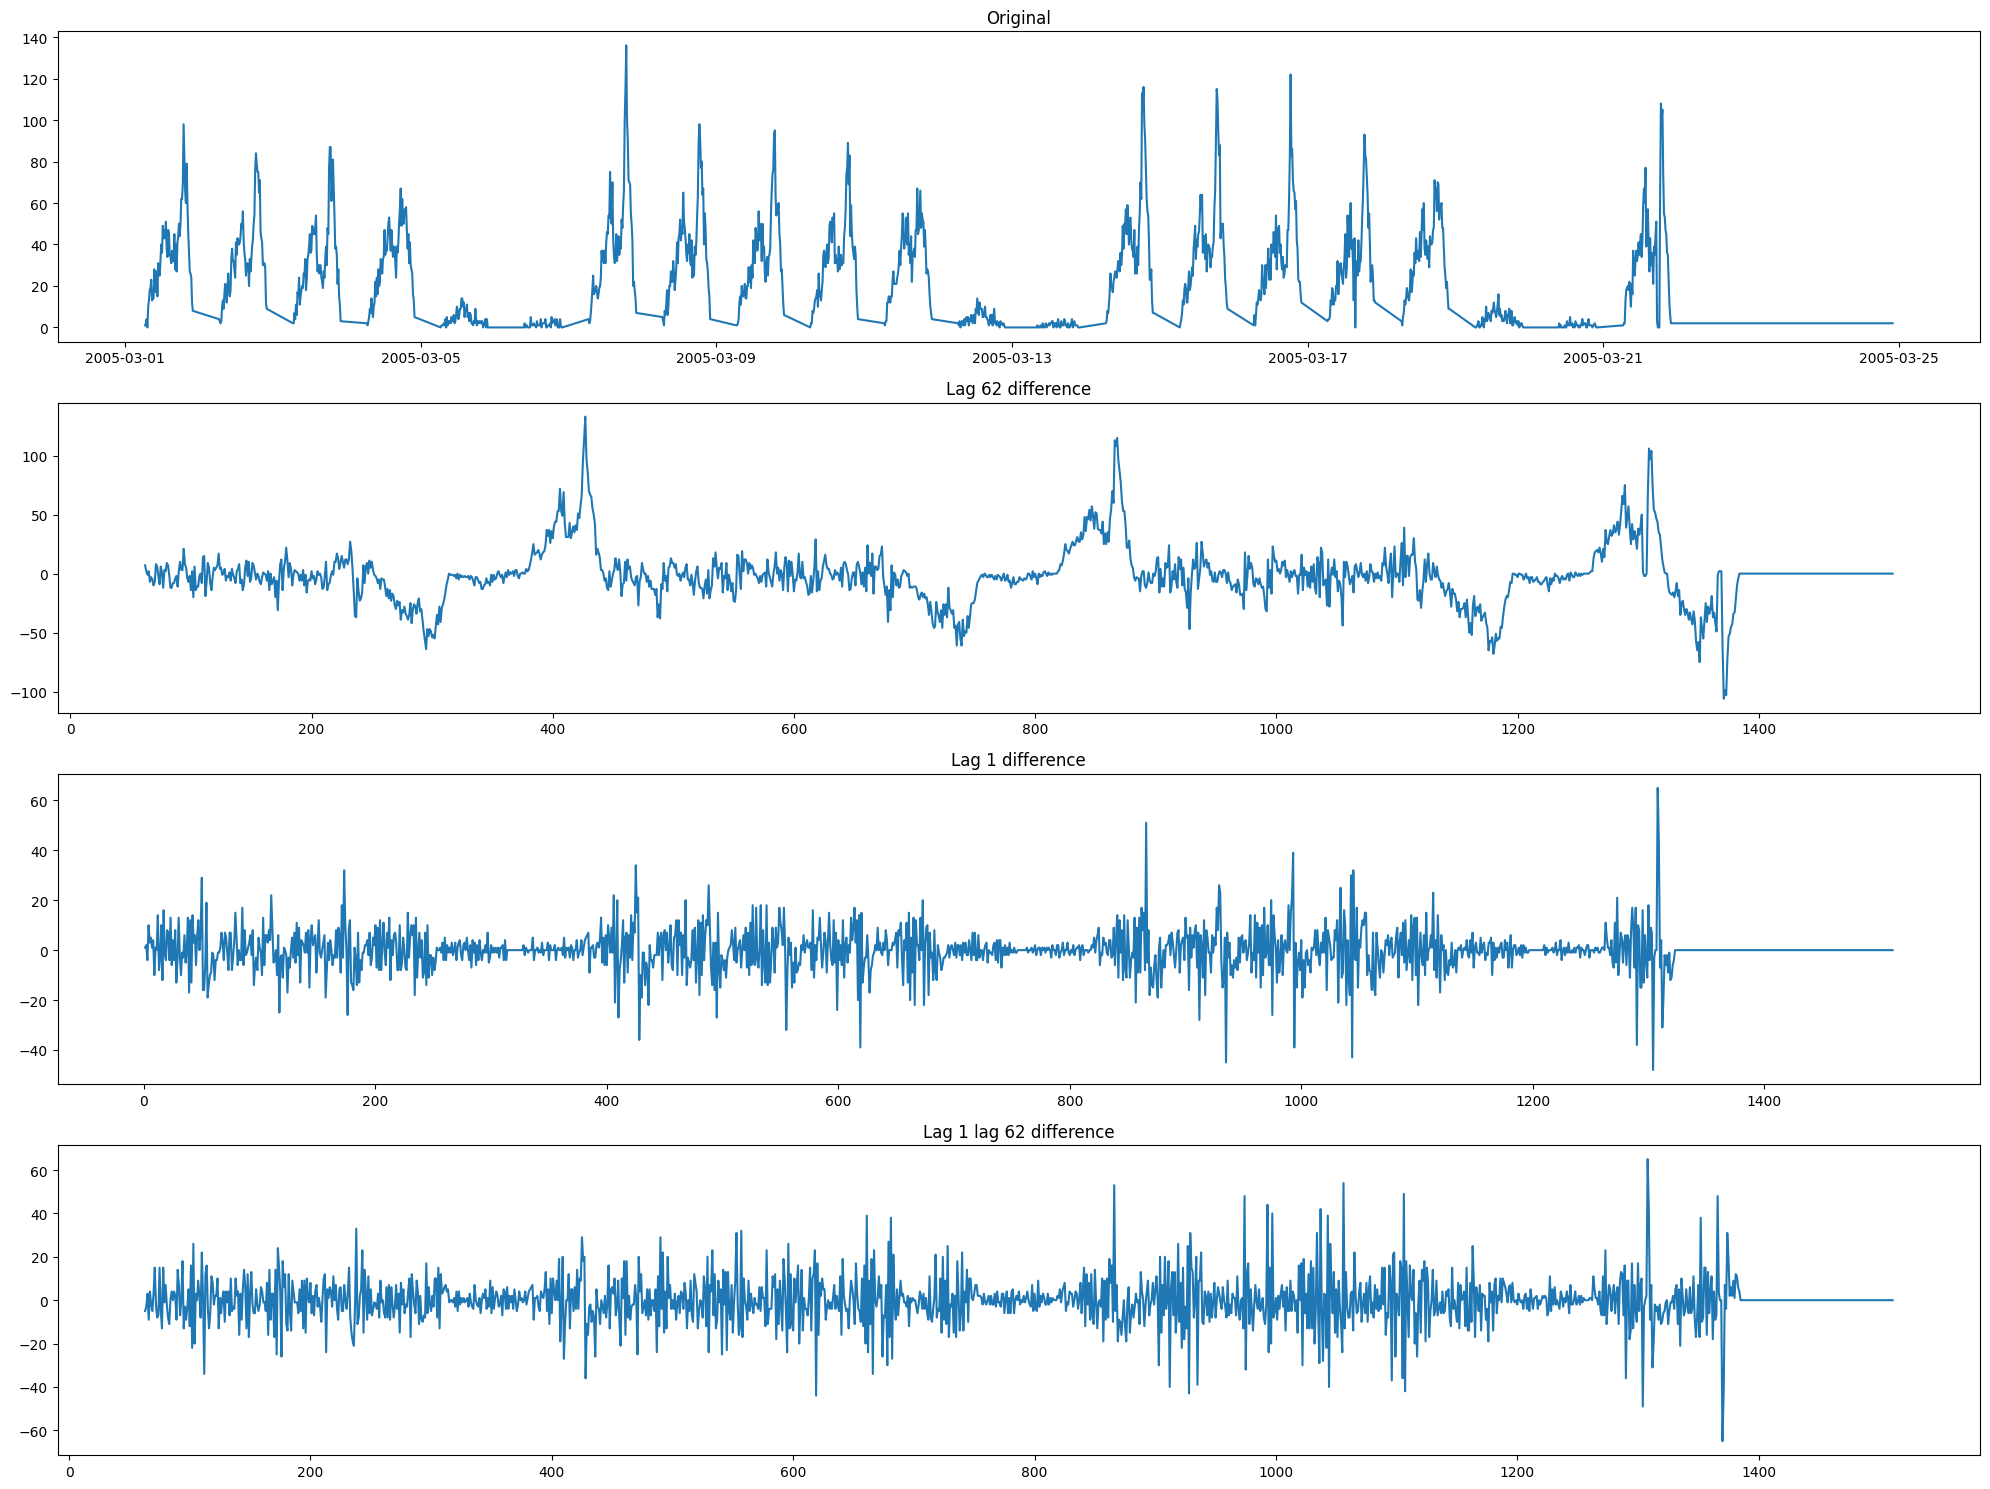

In [10]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'DEMAND' column

plt.figure(figsize=(20, 15))

plt.subplot(411)
plt.plot(df['DATE'], df['DEMAND'])
plt.title('Original')
# Plot Lag 62 difference
plt.subplot(412)
plt.plot(df['DEMAND'].diff(62))
plt.title("Lag 62 difference")

# Plot Lag 1 difference
plt.subplot(413)
plt.plot(df['DEMAND'].diff())
plt.title("Lag 1 difference")

# Plot Lag 1 lag 62 difference
plt.subplot(414)
plt.plot(df['DEMAND'].diff(62).diff())
plt.title("Lag 1 lag 62 difference")

plt.tight_layout()
plt.show()


In [11]:
# ACF and PACF plots

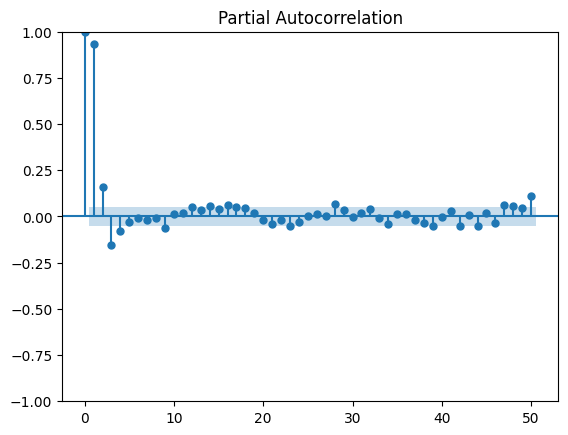

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(df['DEMAND'], lags=50)
plot_pacf(df['DEMAND'], lags=50)
plt.show()

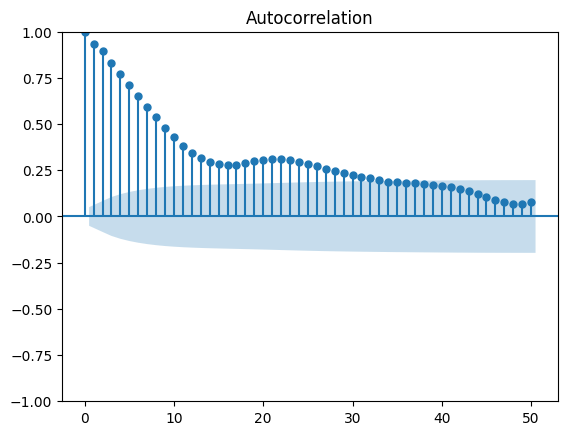

In [13]:
plot_acf(df["DEMAND"],lags=50)
plt.show()

In [14]:
# ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [15]:
train = df.iloc[:868]
validation = df.iloc[868:]

In [16]:
model = ARIMA(train['DEMAND'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 DEMAND   No. Observations:                  868
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3012.388
Date:                Fri, 17 Nov 2023   AIC                           6036.776
Time:                        15:52:29   BIC                           6065.367
Sample:                             0   HQIC                          6047.718
                                - 868                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2009      0.024     -8.374      0.000      -0.248      -0.154
ar.L2          0.1355      0.024      5.725      0.000       0.089       0.182
ar.L3          0.0357      0.024      1.508      0.1

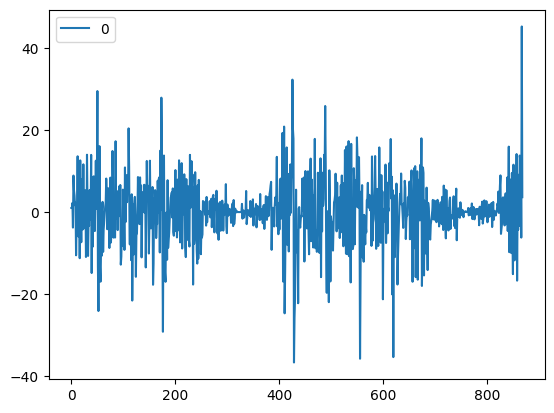

In [17]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [18]:
forecast = model_fit.get_forecast(steps=len(validation))

In [19]:
# prediction
pred = model_fit.predict(start=len(train), end=len(train)+len(validation)-1, typ='levels')
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(validation['DEMAND'], pred)

In [20]:
forecast_start_date = validation['DATE'].iloc[0]
forecast_end_date = forecast_start_date + pd.DateOffset(days=2)

ValueError: x and y must have same first dimension, but have shapes (193,) and (644,)

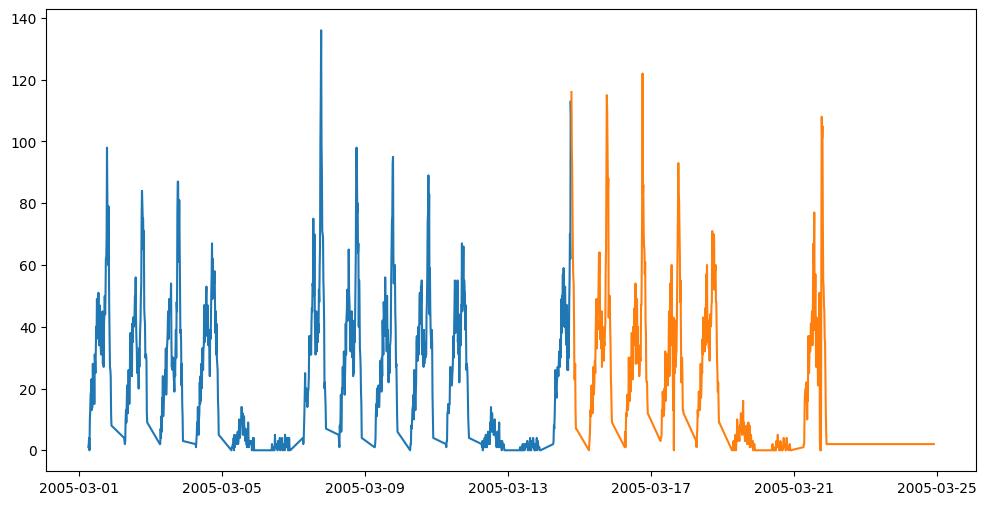

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(train['DATE'], train['DEMAND'], label='Train Data')
plt.plot(validation['DATE'], validation['DEMAND'], label='Validation Data')
plt.plot(pd.date_range(forecast_start_date, forecast_end_date, freq='15T'), forecast.predicted_mean, label='Forecast', linestyle='--')